# Obesity Prediction based on Eating Habits and Physical Activities.

# List of Members:
•	Nikhil Makkena 
•	Manish Reddy Radha Reddy
•	Chathurya Thimmapuram
•	Vaishnavi Choppalli


## Data Preperation and Exploration

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import packages and libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from scipy.stats import shapiro
%matplotlib inline

In [3]:
# Knowing the dataset loaded in gitgist
data= pd.read_csv("https://gist.githubusercontent.com/NikhilMakkena/fbb17ba2eb5eba2d0afabdb34e6f6c45/raw/1e1560ff23c2bfb4a9f0e00442e6043eedc12f04/Obesitydataset.csv")

In [4]:
# Top 10 rows of the dataset
data.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [5]:
# Printing the shape and size of dataset
print(data.shape)

(2111, 17)


## Data preprocessing and cleaning


In [6]:
# Droping Height and Weight columns as they are used in the BMI calculation for our target variable
data = data.drop(columns=['Height', 'Weight'])
print(data.shape)

(2111, 15)


In [7]:
# checking for null values
data[data.isnull().any(axis=1)]

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [8]:
# Convert categorical variables to category instead of object/text 
columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]

for column in columns:
    data[column] = data[column].astype('category')

In [9]:
# function to interigate data after conversion
# provides min, max, unique counts
def variable_counts(columns, stage):

    if stage == 'pre':
        print("Pre Conversion to Integer")
    else:
        print("Post Conversion to Integer")

    for column in columns:    
        print("Variable:", column, "| Count Unique:",data[column].nunique(),"| Min: ", data[column].min(), "| Max: ",data[column].max())

In [10]:
# Convert float variables to integer to the nearest integer
columns = ["FCVC", "NCP", "CH2O", "TUE", "FAF"]

# pre conversion countss
variable_counts(columns, 'pre')

# convert to int / nearest int value
for column in columns:
    #round to nearest whole number
    data[column] = round(data[column]).astype('int')  
    
# post conversion counts
print("")
variable_counts(columns, 'post')

Pre Conversion to Integer
Variable: FCVC | Count Unique: 810 | Min:  1.0 | Max:  3.0
Variable: NCP | Count Unique: 635 | Min:  1.0 | Max:  4.0
Variable: CH2O | Count Unique: 1268 | Min:  1.0 | Max:  3.0
Variable: TUE | Count Unique: 1129 | Min:  0.0 | Max:  2.0
Variable: FAF | Count Unique: 1190 | Min:  0.0 | Max:  3.0

Post Conversion to Integer
Variable: FCVC | Count Unique: 3 | Min:  1 | Max:  3
Variable: NCP | Count Unique: 4 | Min:  1 | Max:  4
Variable: CH2O | Count Unique: 3 | Min:  1 | Max:  3
Variable: TUE | Count Unique: 3 | Min:  0 | Max:  2
Variable: FAF | Count Unique: 4 | Min:  0 | Max:  3


In [11]:
# confirm types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2111 non-null   category
 1   Age                             2111 non-null   float64 
 2   family_history_with_overweight  2111 non-null   category
 3   FAVC                            2111 non-null   category
 4   FCVC                            2111 non-null   int32   
 5   NCP                             2111 non-null   int32   
 6   CAEC                            2111 non-null   category
 7   SMOKE                           2111 non-null   category
 8   CH2O                            2111 non-null   int32   
 9   SCC                             2111 non-null   category
 10  FAF                             2111 non-null   int32   
 11  TUE                             2111 non-null   int32   
 12  CALC                

## Data Intuition & Further Exploration


### Categorical Variables


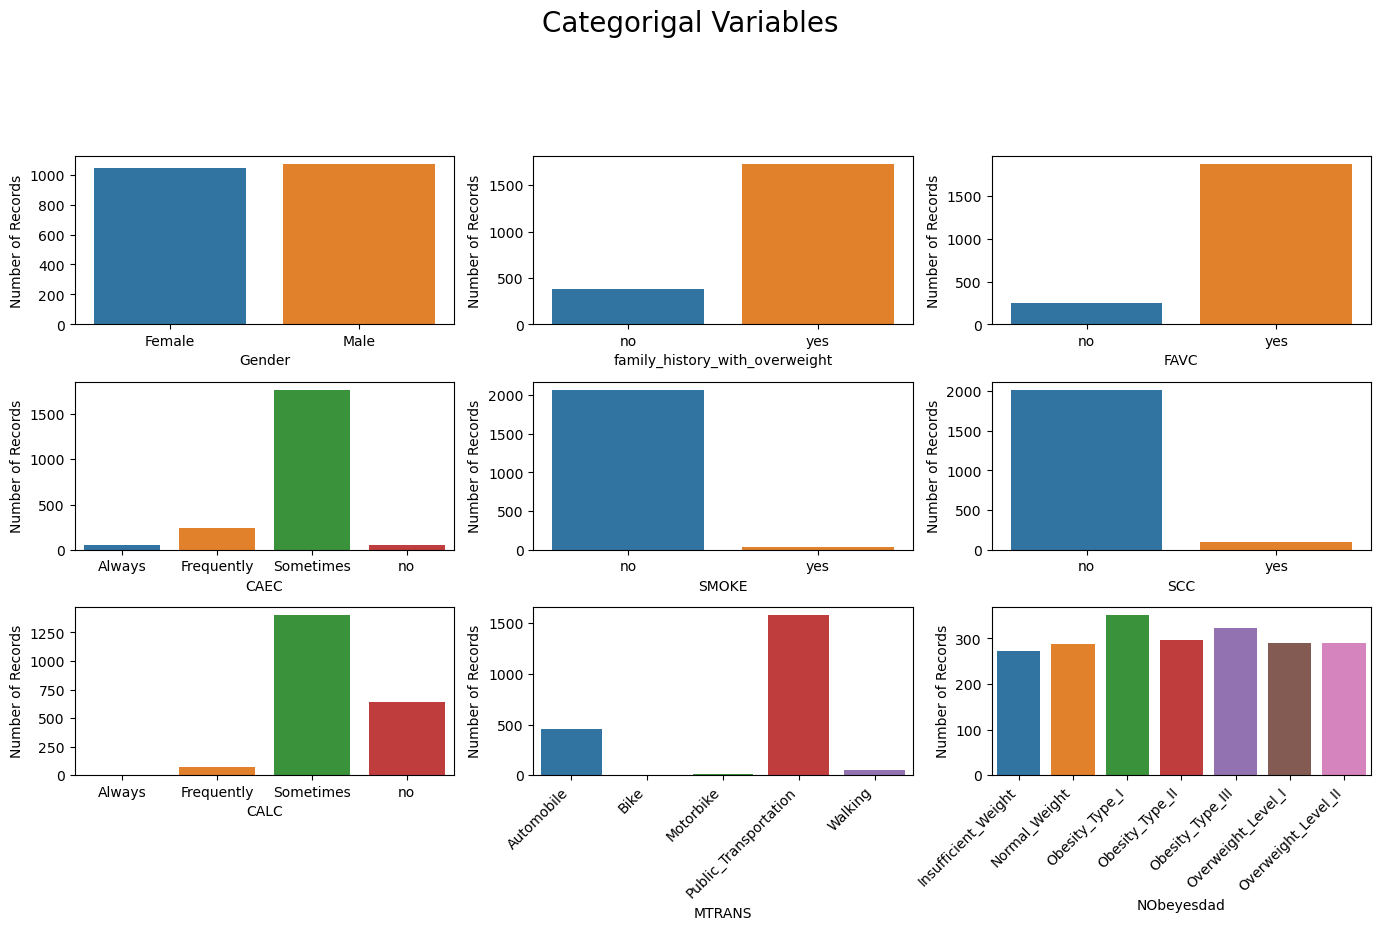

In [12]:
columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE','SCC', 'CALC', 'MTRANS', 'NObeyesdad']
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for col, subplot in zip(columns, ax.flatten()):
    sns.countplot(data=data, x=col,  ax=subplot)
 
    if col=="MTRANS":
        sns.countplot(data=data, x=col,  ax=subplot) 
        subplot.set_xticklabels(rotation=45, horizontalalignment='right', labels=["Automobile", "Bike", "Motorbike", "Public_Transportation","Walking"])
        subplot.yaxis.label.set_text("Number of Records")
    elif col=="NObeyesdad":
        sns.countplot(data=data, x=col,  ax=subplot)
        subplot.set_xticklabels(rotation=45, horizontalalignment='right', labels=["Insufficient_Weight","Normal_Weight","Obesity_Type_I","Obesity_Type_II","Obesity_Type_III","Overweight_Level_I","Overweight_Level_II"])
        subplot.yaxis.label.set_text("Number of Records")
    else:
        sns.countplot(data=data, x=col,  ax=subplot)  
        subplot.yaxis.label.set_text("Number of Records")
        
# show figure & plots
fig.suptitle("Categorigal Variables", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.0, h_pad=1)
plt.show()

### Predictor Coorelations


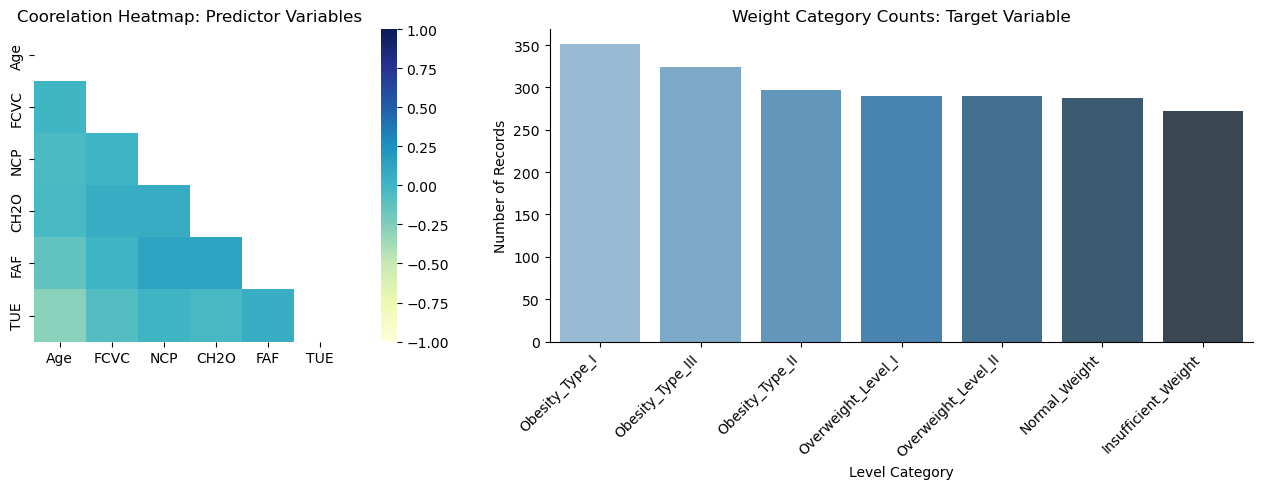

In [13]:
# create figure
fig = plt.figure(figsize=(15, 5))

# add subplot for one row 2 graphs first postion
ax1 = fig.add_subplot(121)

# correlation data matrix
matrix = np.triu(data.corr())

# set title 
ax1.title.set_text("Coorelation Heatmap: Predictor Variables")

#define plot
sns.heatmap(data.corr(), 
                 mask=matrix,
                 annot = False,                 
                 fmt='.1g', 
                 cmap="YlGnBu", 
                 vmin=-1, vmax=1, center= 0,                 
                 square="True",
                 ax=ax1)

# add second subplot
ax2 = fig.add_subplot(122)

# rotate axis label
ax2.set_xticklabels(rotation=45, horizontalalignment='right', labels=data.NObeyesdad)

# Set title text
ax2.title.set_text("Weight Category Counts: Target Variable")

# define second plot
sns.countplot(x="NObeyesdad",                  
                 palette="Blues_d", 
                 order=data.NObeyesdad.value_counts().index,
                 ax = ax2,
                 data=data)

# labels for x and y
ax2.xaxis.label.set_text("Level Category")
ax2.yaxis.label.set_text("Number of Records")

# turn off top and right frame lines
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# show figure & plots
plt.tight_layout()
plt.show()

### Target Variable 

In [14]:
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

#print highly correlated variables
print("Number of variables with > 0.95 correlation: ", len(to_drop))

Number of variables with > 0.95 correlation:  0


## Data prep for ML models 

### Data Treatment

In [15]:
data_Preparation = data.copy()

In [16]:
# create dummy variables
data_p = pd.get_dummies(data_Preparation,columns=["Gender","family_history_with_overweight",
                                          "FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"])
data_p.head()

,Age,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,Gender_Male,family_history_with_overweight_no,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,2,3,2,0,1,Normal_Weight,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,21.0,3,3,3,3,0,Normal_Weight,1,0,0,...,1,0,0,1,0,0,0,0,1,0
2,23.0,2,3,2,2,1,Normal_Weight,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,27.0,3,3,2,2,0,Overweight_Level_I,0,1,1,...,0,0,1,0,0,0,0,0,0,1
4,22.0,2,1,2,0,0,Overweight_Level_II,0,1,1,...,0,0,0,1,0,0,0,0,1,0


In [17]:
# split dataset in features and target variable

# Features
X = data_p.drop(columns=["NObeyesdad"])

# Target variabley.astype(np.float64)
y = data_p['NObeyesdad'] 


In [18]:
y

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: category
Categories (7, object): ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']

In [19]:
# import sklearn packages for data treatments
from sklearn.model_selection import train_test_split # Import train_test_split function

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

## Machine Learning Models

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier# Import Decision Tree Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler # Import for standard scaling of the data
from sklearn.preprocessing import MinMaxScaler 

# standard scale data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# tested MinMaxScaler as KNN historically does better with MinMax
mm = MinMaxScaler()
X_train_mm_scaled = ss.fit_transform(X_train)
X_test_mm_scaled = ss.transform(X_test)

# program to run multilple models though sklearn 
# Default settings output accuracy and classification report
# compares accuracy for scaled and unscaled data
def run_models(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):
    
    models = [          
          ('Random Forest', RandomForestClassifier(random_state=2020)),
          ('Decision Tree', DecisionTreeClassifier()),                                                 
          ('KNN', KNeighborsClassifier()),
          ('LogisticRegression',LogisticRegression()),
          #('LinearRegression',LinearRegression())
        ]  
    
    for name, model in models:        
        # unscaled data
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)
        
        # mm scaled data
        clf_mm_scaled = model.fit(X_train_mm_scaled, y_train)
        y_pred_mm_scaled = clf_scaled.predict(X_test_mm_scaled)
        
        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),5)
        
        # output
        print(name + ':')        
        print("---------------------------------------------------------------")      
        print("Accuracy:", accuracy)
        print("Accuracy w/Scaled Data (ss):", scaled_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_mm_accuracy)
        if (accuracy > scaled_accuracy) and (accuracy > scaled_mm_accuracy):
            print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))      
            print("                            -----------------------------------               \n")      
        elif (scaled_accuracy > scaled_mm_accuracy):
            print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))      
            print("                            -----------------------------------               \n")     
        else:            
            print("\nClassification Report (mm):\n", metrics.classification_report(y_test, y_pred_mm_scaled))      
            print("                            -----------------------------------               \n")

In [21]:
#run Decision Trees, Random Forest, KNN and Logistic regression  
run_models(X_train, y_train, X_test, y_test)

Random Forest:
---------------------------------------------------------------
Accuracy: 0.82177
Accuracy w/Scaled Data (ss): 0.82177
Accuracy w/Scaled Data (mm): 0.82177

Classification Report (mm):
                      precision    recall  f1-score   support

Insufficient_Weight       0.85      0.87      0.86        92
      Normal_Weight       0.60      0.69      0.64        77
     Obesity_Type_I       0.85      0.80      0.82       114
    Obesity_Type_II       0.90      0.94      0.92        85
   Obesity_Type_III       0.99      0.99      0.99        92
 Overweight_Level_I       0.79      0.71      0.75        89
Overweight_Level_II       0.76      0.74      0.75        85

           accuracy                           0.82       634
          macro avg       0.82      0.82      0.82       634
       weighted avg       0.83      0.82      0.82       634

                            -----------------------------------               

Decision Tree:
------------------------------

# Scaled Data HyperParameter Tuning

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_scaled,y_train)
y_pred_scaled=knn.predict(X_test_scaled)
scaled_accuracy_s_1 = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
scaled_accuracy_s_1

0.77287

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled,y_train)
y_pred_scaled=knn.predict(X_test_scaled)
scaled_accuracy_s_3 = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
scaled_accuracy_s_3

0.73186

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled,y_train)
y_pred_scaled=knn.predict(X_test_scaled)
scaled_accuracy_s_5 = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
scaled_accuracy_s_5

0.73502

In [25]:
knn_hyper_stand=[scaled_accuracy_s_1*100,scaled_accuracy_s_3*100,scaled_accuracy_s_5*100]

In [26]:
column=['Neighbour=1','Neighbour=3','Neighbour=5']

<Axes: title={'center': 'KNN Hyperparameter Tuning'}, xlabel='Nearest Neighbours', ylabel='Accuracy Percentage'>

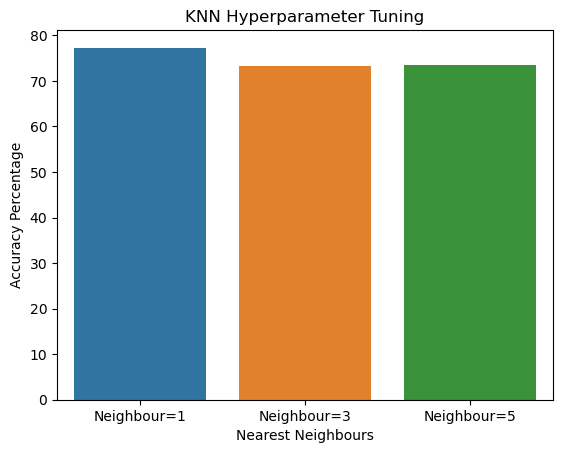

In [27]:
knn_hyper_stand=[scaled_accuracy_s_1*100,scaled_accuracy_s_3*100,scaled_accuracy_s_5*100]
column=['Neighbour=1','Neighbour=3','Neighbour=5']
plt.title('KNN Hyperparameter Tuning')
plt.ylabel('Accuracy Percentage')
plt.xlabel('Nearest Neighbours')
sns.barplot(y=knn_hyper_stand,x=column)

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=40)
dtc.fit(X_train_scaled,y_train)
y_pred_scaled=dtc.predict(X_test_scaled)
scaled_accuracy_s_40 = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
scaled_accuracy_s_40


0.76025

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=80,criterion='entropy')
dtc.fit(X_train_scaled,y_train)
y_pred_scaled=dtc.predict(X_test_scaled)
scaled_accuracy_s_80 = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
scaled_accuracy_s_80

0.74921

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=20,criterion='entropy')
dtc.fit(X_train_scaled,y_train)
y_pred_scaled=dtc.predict(X_test_scaled)
scaled_accuracy_s_20 = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
scaled_accuracy_s_20

0.75237

In [31]:
decision_hyper_para_stan=[scaled_accuracy_s_20*100,scaled_accuracy_s_40*100,scaled_accuracy_s_80*100]
column=['MaxDepth 20','MaxDepth 40','MaxDepth 80']

<Axes: title={'center': 'Decision Tree Hyperparameter Tuning'}, xlabel='Max Depth', ylabel='Accuracy Percentage'>

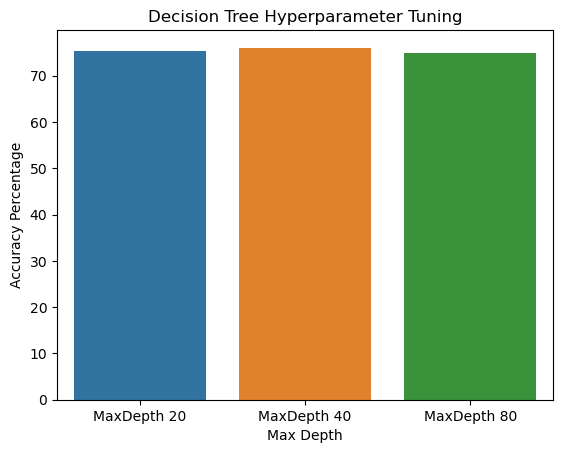

In [32]:
decision_hyper_para_stan=[scaled_accuracy_s_20*100,scaled_accuracy_s_40*100,scaled_accuracy_s_80*100]
column=['MaxDepth 20','MaxDepth 40','MaxDepth 80']
plt.title('Decision Tree Hyperparameter Tuning')
plt.ylabel('Accuracy Percentage')
plt.xlabel('Max Depth')
sns.barplot(y=decision_hyper_para_stan,x=column)

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=20,criterion='entropy')
rfc.fit(X_train_scaled,y_train)
y_pred_scaled=rfc.predict(X_test_scaled)
scaled_accuracy_s_20r  = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
scaled_accuracy_s_20r 

0.81388

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=40,criterion='entropy')
rfc.fit(X_train_scaled,y_train)
y_pred_scaled=rfc.predict(X_test_scaled)
scaled_accuracy_s_40r = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
scaled_accuracy_s_40r

0.81861

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=80)
rfc.fit(X_train_scaled,y_train)
y_pred_scaled=rfc.predict(X_test_scaled)
scaled_accuracy_s_80r = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
scaled_accuracy_s_80r

0.8123

In [36]:
randamforest_hyper_para_stan=[scaled_accuracy_s_20r*100,scaled_accuracy_s_40r*100,scaled_accuracy_s_80r*100]
column=['MaxDepth 20','MaxDepth 40','MaxDepth 80']

<Axes: title={'center': 'Random Forest Hyperparameter Tuning'}, xlabel='Max Depth', ylabel='Accuracy Percentage'>

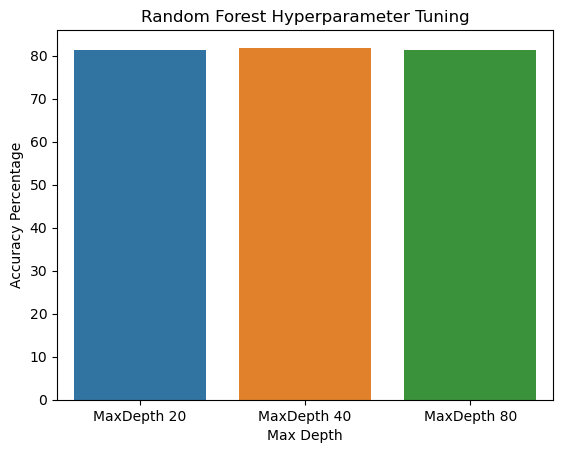

In [37]:
randamforest_hyper_para_stan=[scaled_accuracy_s_20r*100,scaled_accuracy_s_40r*100,scaled_accuracy_s_80r*100]
column=['MaxDepth 20','MaxDepth 40','MaxDepth 80']
plt.title('Random Forest Hyperparameter Tuning')
plt.ylabel('Accuracy Percentage')
plt.xlabel('Max Depth')
sns.barplot(y=randamforest_hyper_para_stan,x=column)

<Axes: title={'center': 'Overall Hyperparameter Tuning for Standar Scaler'}, xlabel='Max Depth', ylabel='Accuracy Percentage'>

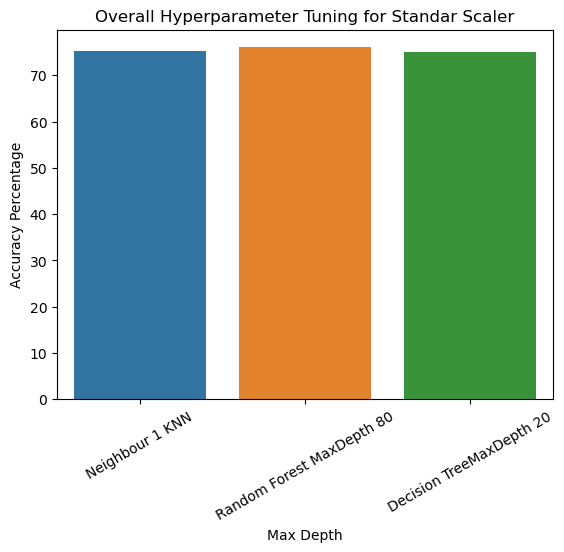

In [38]:
overall_hyper_para_stan=[scaled_accuracy_s_1*100,scaled_accuracy_s_80r*100,scaled_accuracy_s_20*100]
column=['Neighbour 1 KNN','Random Forest MaxDepth 80','Decision TreeMaxDepth 20']
plt.title('Overall Hyperparameter Tuning for Standar Scaler')
plt.ylabel('Accuracy Percentage')
plt.xlabel('Max Depth')
plt.tick_params(axis='x', rotation=30)
sns.barplot(y=decision_hyper_para_stan,x=column)

# MinMax Data Hyperparameter Tuning

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_mm_scaled,y_train)
y_pred_scaled=knn.predict(X_test_mm_scaled)
scaled_accuracy_m_1 = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
scaled_accuracy_m_1 

0.77287

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_mm_scaled,y_train)
y_pred_scaled=knn.predict(X_test_mm_scaled)
scaled_accuracy_m_3 = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
scaled_accuracy_m_3

0.73186

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_mm_scaled,y_train)
y_pred_scaled=knn.predict(X_test_mm_scaled)
scaled_accuracy_m_5= round(metrics.accuracy_score(y_test, y_pred_scaled),5)
scaled_accuracy_m_5

0.73502

<Axes: title={'center': 'KNN Hyperparameter Tuning For Min Max'}, xlabel='Nearest Neighbours', ylabel='Accuracy Percentage'>

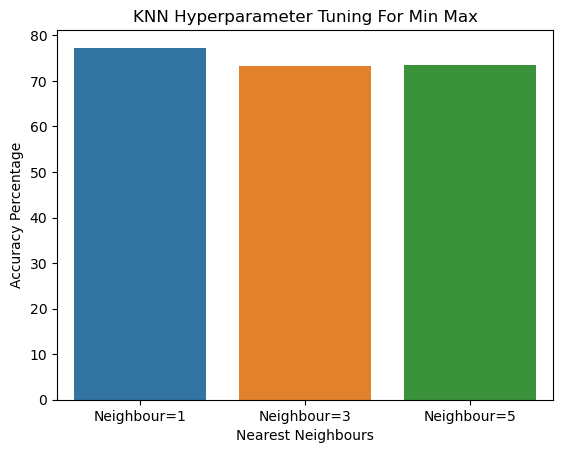

In [42]:
knn_hyper_stand=[scaled_accuracy_m_1*100,scaled_accuracy_m_3*100,scaled_accuracy_m_5*100]
column=['Neighbour=1','Neighbour=3','Neighbour=5']
plt.title('KNN Hyperparameter Tuning For Min Max')
plt.ylabel('Accuracy Percentage')
plt.xlabel('Nearest Neighbours')
sns.barplot(y=knn_hyper_stand,x=column)

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=20)
dtc.fit(X_train_mm_scaled,y_train)
y_pred_scaled=dtc.predict(X_test_mm_scaled)
scaled_accuracy_m_20 = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
scaled_accuracy_m_20 

0.74921

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=80)
dtc.fit(X_train_mm_scaled,y_train)
y_pred_scaled=dtc.predict(X_test_mm_scaled)
scaled_accuracy_m_80 = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
scaled_accuracy_m_80

0.77129

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=40)
dtc.fit(X_train_mm_scaled,y_train)
y_pred_scaled=dtc.predict(X_test_mm_scaled)
scaled_accuracy_m_40= round(metrics.accuracy_score(y_test, y_pred_scaled),5)
scaled_accuracy_m_40

0.76025

<Axes: title={'center': 'DTC Hyperparameter Tuning For Min Max'}, xlabel='Max depth', ylabel='Accuracy Percentage'>

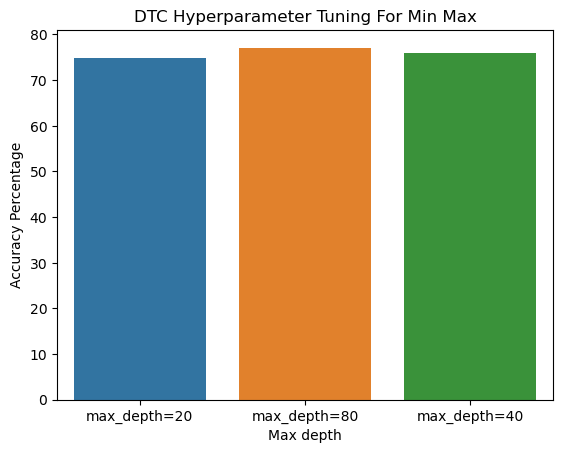

In [46]:
dtc_hyper_stand=[scaled_accuracy_m_20*100 ,scaled_accuracy_m_80*100,scaled_accuracy_m_40*100]
column=['max_depth=20','max_depth=80','max_depth=40']
plt.title('DTC Hyperparameter Tuning For Min Max')
plt.ylabel('Accuracy Percentage')
plt.xlabel('Max depth')
sns.barplot(y=dtc_hyper_stand,x=column)

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=80,criterion='entropy')
rfc.fit(X_train_mm_scaled,y_train)
y_pred_scaled=rfc.predict(X_test_mm_scaled)
scaled_accuracy_m_80r= round(metrics.accuracy_score(y_test, y_pred_scaled),5)
scaled_accuracy_m_80r

0.82334

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=20,criterion='entropy')
rfc.fit(X_train_mm_scaled,y_train)
y_pred_scaled=rfc.predict(X_test_mm_scaled)
scaled_accuracy_m_20r = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
scaled_accuracy_m_20r 

0.8123

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=40,criterion='entropy')
rfc.fit(X_train_mm_scaled,y_train)
y_pred_scaled=rfc.predict(X_test_mm_scaled)
scaled_accuracy_m_40r = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
scaled_accuracy_m_40r

0.82019

<Axes: title={'center': 'Random Forest Hyperparameter Tuning'}, xlabel='Max Depth', ylabel='Accuracy Percentage'>

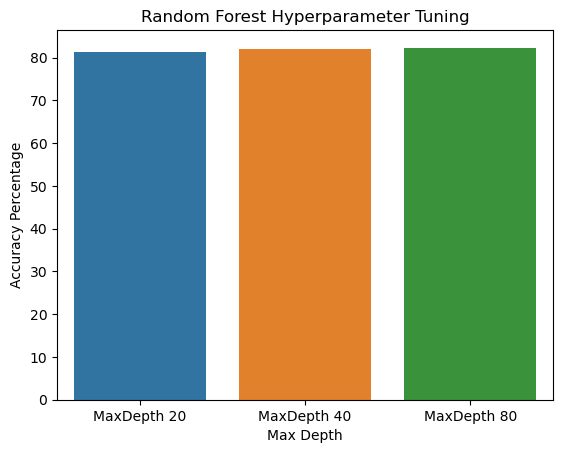

In [50]:
randamforest_hyper_para_stan=[scaled_accuracy_m_20r*100,scaled_accuracy_m_40r*100,scaled_accuracy_m_80r*100]
column=['MaxDepth 20','MaxDepth 40','MaxDepth 80']
plt.title('Random Forest Hyperparameter Tuning')
plt.ylabel('Accuracy Percentage')
plt.xlabel('Max Depth')
sns.barplot(y=randamforest_hyper_para_stan,x=column)

# Overall Best Model after Hyperparameter Tuning

<Axes: title={'center': 'Overall Hyperparameter Tuning'}, xlabel='Max Depth', ylabel='Accuracy Percentage'>

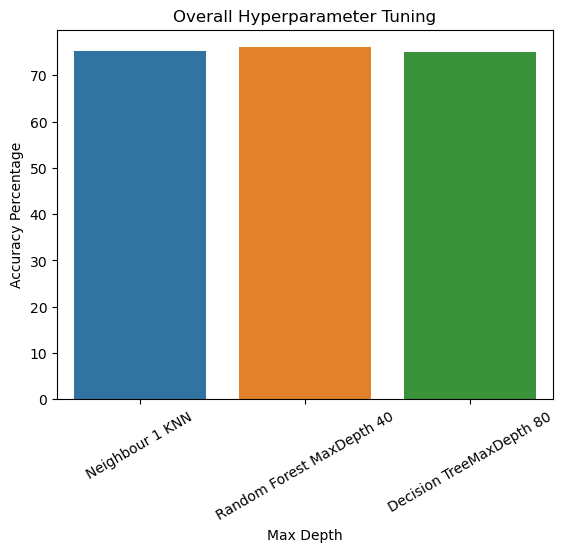

In [51]:
overall_hyper_para_stan=[scaled_accuracy_m_1*100,scaled_accuracy_m_20r*100,scaled_accuracy_m_80*100]
column=['Neighbour 1 KNN','Random Forest MaxDepth 40','Decision TreeMaxDepth 80']
plt.title('Overall Hyperparameter Tuning')
plt.ylabel('Accuracy Percentage')
plt.xlabel('Max Depth')
plt.tick_params(axis='x', rotation=30)
sns.barplot(y=decision_hyper_para_stan,x=column)

# Testing Our own personal data on the Best Model 

['Age' = 23.7,
 'FCVC' = 2, 
 'NCP' = 2, 
 'CH2O' = 2, 
 'FAF' = 1, 
 'TUE'= 2,
 'Gender_Female' = 0,
 'Gender_Male' = 1, 
 'family_history_with_overweight_no' = 0,
 'family_history_with_overweight_yes' = 1, 
 'FAVC_no'=0, 
 'FAVC_yes'=1,
 'CAEC_Always'=0, 
 'CAEC_Frequently'=0, 
 'CAEC_Sometimes'=1, 
 'CAEC_no'=0,
 'SMOKE_no'=1, 
 'SMOKE_yes'=0, 
 'SCC_no'=1, 
 'SCC_yes'=0, 
 'CALC_Always'=0,
 'CALC_Frequently'=0, 
 'CALC_Sometimes'=0, 
 'CALC_no'=0, 
 'MTRANS_Automobile'=1,
 'MTRANS_Bike'=0, 
 'MTRANS_Motorbike'=0, 
 'MTRANS_Public_Transportation'=1,
 'MTRANS_Walking'=0]

In [52]:
X_pre1=([[23.7,2,2,2,1,2,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0]])
sample = rfc.predict(X_pre1)
print(sample)

['Obesity_Type_I']
